In [30]:
import matplotlib.pyplot as plt
import healpy as hp
import numpy as np
from astropy.coordinates import SkyCoord, AltAz, EarthLocation
from astropy.time import Time
import astropy.units as u

from qubic.scripts.Scanning_Strategy import Sky_Dips_Sim

In [31]:
sample_params = {
                        'latitude': -24.1844,
                        'longitude': -66.8714,
                        'RA_center': -34.667,
                        'DEC_center': -8.016,
                        'date_obs': '2026-01-01 00:00:00',
                        'duration': 24,  # in hours
                        'angspeed': 1,  # deg/s
                        'delta_az': 20.0,  # deg
                        'nsweeps_per_elevation': 25,
                        'period': 1,  # s
            }
sampling = Sky_Dips_Sim.QubicObservation(sample_params).get_pointing()

*********** 21 recenterings performed ***********


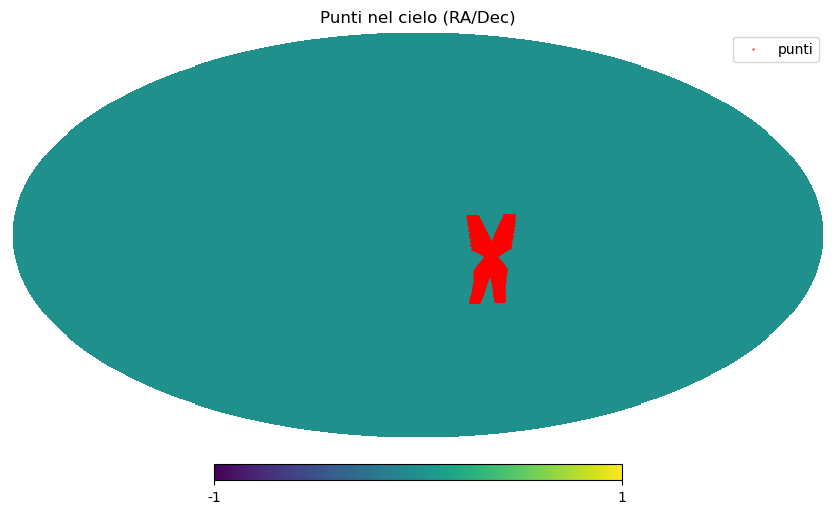

In [32]:
# I tuoi punti in azimuth ed elevation (in gradi)
#az = np.array([0, 45, 90, 180, 270])   # esempio
#el = np.array([30, 50, 60, 10, 20])

# Posizione dell'osservatore (es. Parigi)
#lat = -24.1844      # [deg]
##lon = -66.8714       # [deg]
#alt = 35           # [m]

# Data e ora dell'osservazione (UTC)
time = Time("2026-01-01T00:00:00")

# =============================
# CONVERSIONE AZ/EL → RA/DEC
# =============================

#location = EarthLocation(lat=lat*u.deg, lon=lon*u.deg) #, height=alt*u.m)
#altaz = AltAz(az=az*u.deg, alt=el*u.deg, obstime=time, location=location)
skycoord = SkyCoord(sampling)

ra = skycoord.icrs.ra.radian
dec = skycoord.icrs.dec.radian

# =============================
# CONVERSIONE IN COORDINATE HEALPIX
# =============================

theta = np.pi/2 - dec   # colatitudine
phi = ra                # longitudine

# =============================
# PLOT CON HEALPY
# =============================

hp.mollview(np.zeros(hp.nside2npix(128)), title="Punti nel cielo (RA/Dec)")
hp.projscatter(theta, phi, lonlat=False, c='r', marker='.', s=1, label='punti')
plt.legend()
plt.show()


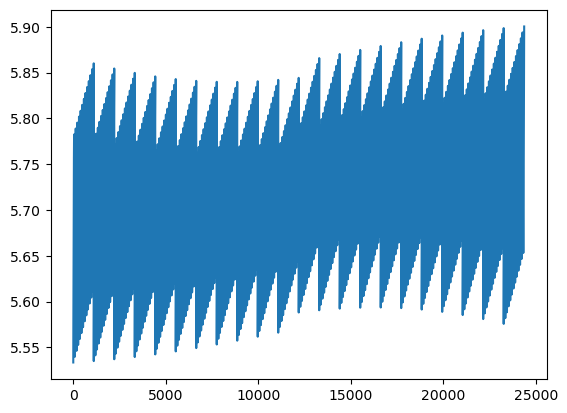

In [33]:
plt.plot(ra)

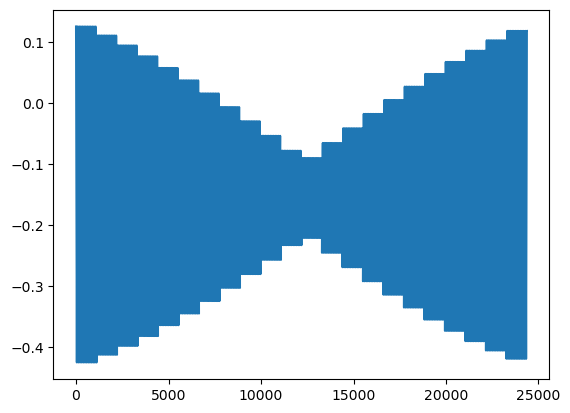

In [34]:
plt.plot(dec)

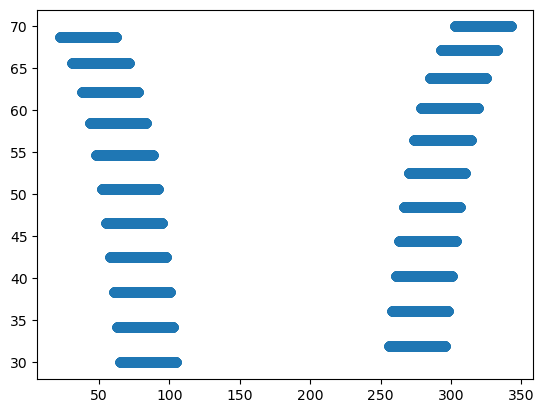

In [35]:
plt.scatter(sampling.az, sampling.alt)

## ----------------------------------------------------------------

In [37]:
sample_params = {
                        'latitude': -24.1844,
                        'longitude': -66.8714,
                        'RA_center': -34.667,
                        'DEC_center': -8.016,
                        'date_obs': '2026-01-01 00:00:00',
                        'duration': 24,  # in hours
                        'angspeed': 1,  # deg/s
                        'delta_az': 20.0,  # deg
                        'nsweeps_per_elevation': 25,
                        'period': 1,  # s
            }
sampling = Sky_Dips_Sim.QubicObservation(sample_params).get_samplings()

*********** 21 recenterings performed ***********


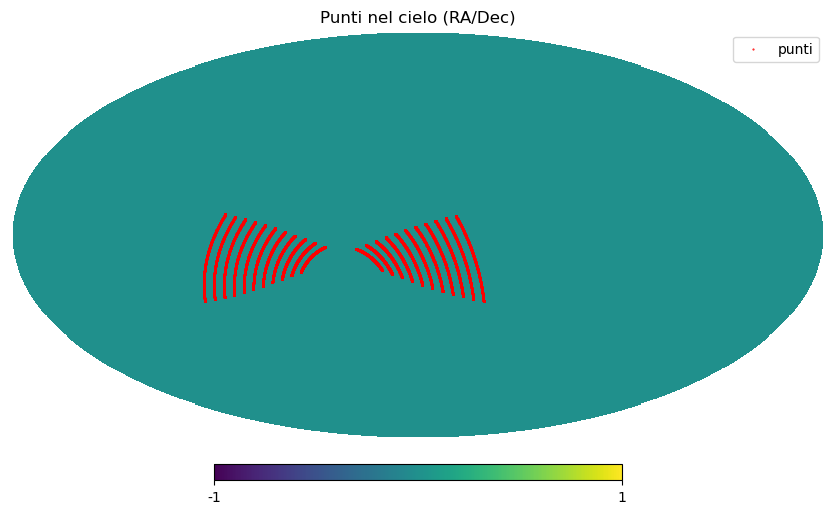

In [38]:
# I tuoi punti in azimuth ed elevation (in gradi)
az = sampling.azimuth
el = sampling.elevation

# Posizione dell'osservatore (es. Parigi)
lat = -24.1844      # [deg]
lon = -66.8714       # [deg]
#alt = 35           # [m]

# Data e ora dell'osservazione (UTC)
time = Time("2026-01-01T00:00:00")

# =============================
# CONVERSIONE AZ/EL → RA/DEC
# =============================

location = EarthLocation(lat=lat*u.deg, lon=lon*u.deg) #, height=alt*u.m)
altaz = AltAz(az=az*u.deg, alt=el*u.deg, obstime='2026-01-01 00:00:00', location=location)
skycoord2 = SkyCoord(altaz)

ra = skycoord2.icrs.ra.radian
dec = skycoord2.icrs.dec.radian

# =============================
# CONVERSIONE IN COORDINATE HEALPIX
# =============================

theta = np.pi/2 - dec   # colatitudine
phi = ra                # longitudine

# =============================
# PLOT CON HEALPY
# =============================

hp.mollview(np.zeros(hp.nside2npix(128)), title="Punti nel cielo (RA/Dec)")
hp.projscatter(theta, phi, lonlat=False, c='r', marker='.', s=1, label='punti')
plt.legend()
plt.show()


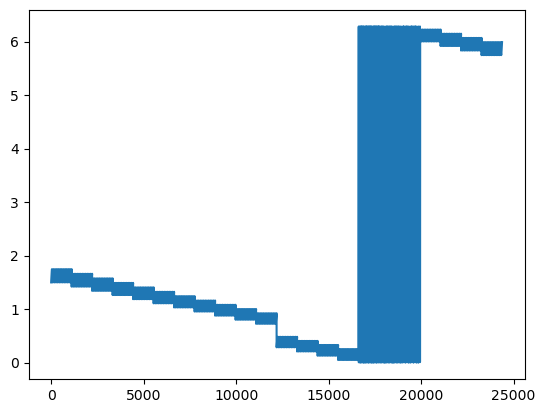

In [39]:
plt.plot(ra)

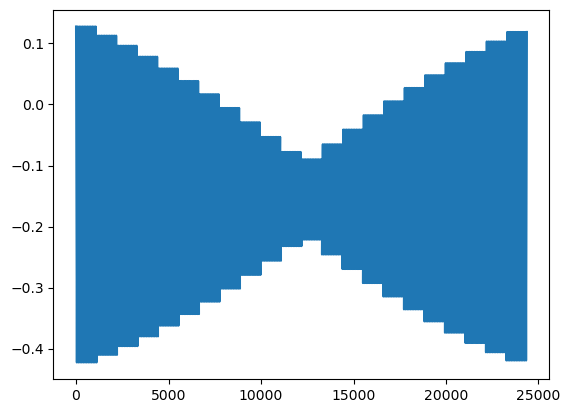

In [40]:
plt.plot(dec)

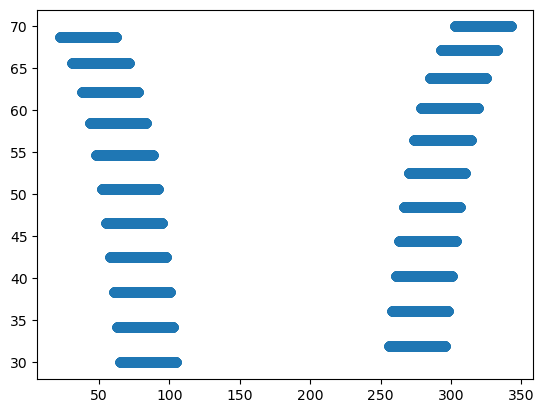

In [41]:
plt.scatter(az,el)

In [42]:
skycoord

<SkyCoord (AltAz: obstime=['2026-01-01 15:22:16.850' '2026-01-01 15:22:17.850'
 '2026-01-01 15:22:18.850' ... '2026-01-01 23:35:22.850'
 '2026-01-01 23:35:23.850' '2026-01-01 23:35:24.850'], location=(2286706.35651038, -5353701.28619339, -2596928.33061284) m, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    [( 65.10552564, 30.00016099), ( 65.53856444, 30.00016099),
     ( 66.5393757 , 30.00016099), ..., (295.90318171, 31.98401993),
     (295.90318171, 31.98401993), (295.90318171, 31.98401993)]>

In [43]:
skycoord2

<SkyCoord (AltAz: obstime=2026-01-01 00:00:00.000, location=(2286706.35651038, -5353701.28619339, -2596928.33061284) m, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    [( 65.10552 , 30.00016), ( 65.53857 , 30.00016),
     ( 66.539375, 30.00016), ..., (295.90317 , 31.98402),
     (295.90317 , 31.98402), (295.90317 , 31.98402)]>